#Importando as bibliotecas necessárias

In [333]:
import pandas as pd
import sklearn as sk
import plotly.express as px #Gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go #Criação e concatenização de gráficos
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np #funções matemáticas de alto nível

#Carregando as bases de dados

In [262]:
dados_headbrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS CIENT DADOS - XP/MÓDULO 1/DESM1/dados_headbrain.csv', sep = ';',decimal = ',')
dados_pacientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS CIENT DADOS - XP/MÓDULO 1/DESM1/dados_pacientes.csv', sep = ';',decimal = ',')

#Visualização dos arquivos

In [263]:
#Visualizando arquivos
dados_headbrain.head()

,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590


In [264]:
dados_headbrain.count()

cod_paciente           319
genero                 319
Head Size(cm^3)        319
Brain Weight(grams)    319
dtype: int64

In [265]:
dados_headbrain.describe()

,cod_paciente,Head Size(cm^3),Brain Weight(grams)
count,319.000000,319.000000,319.000000
mean,121.755486,3642.238245,1281.996865
std,65.268120,351.124447,117.665246
min,1.000000,2720.000000,955.000000
25%,75.500000,3394.000000,1209.000000
50%,115.000000,3632.000000,1280.000000
75%,175.500000,3876.000000,1350.000000
max,237.000000,4747.000000,1635.000000


In [266]:
dados_pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [267]:
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [268]:
dados_pacientes.count()

id_cliente         7999
idade              7999
classe_trabalho    7612
escolaridade       7999
id_estado          7999
estado_civil       7999
raca               7999
qtde_filhos        7989
salario            7999
dtype: int64

#Verificação de dados nulos e duplicadas e tratando-os

In [269]:
#Verificação de dados nulos
na_dados_pacientes = dados_pacientes.isna().sum()
na_dados_pacientes_sum = na_dados_pacientes.sum()
print(na_dados_pacientes)
print('--------------',na_dados_pacientes_sum)

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64
-------------- 397


In [270]:
#Verificação de dados nulos
na_dados_headbrain = dados_headbrain.isna().sum()
na_dados_headbrain_sum = na_dados_headbrain.sum()
print(na_dados_headbrain)
print('--------------',na_dados_headbrain_sum)

cod_paciente           0
genero                 0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64
-------------- 0


<Axes: >

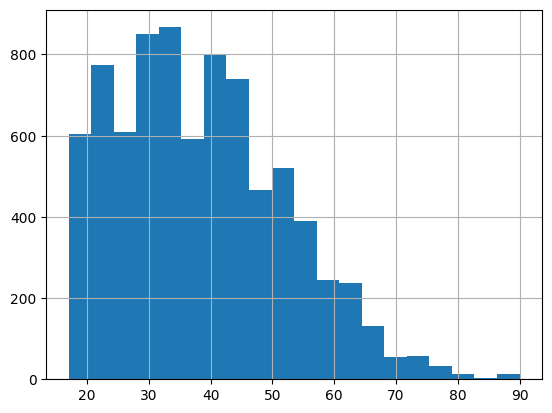

In [271]:
#Histograma
dados_pacientes['idade'].hist(bins=20)

In [272]:
#Verificação de duplicatas
dupl_dados_pacientes = dados_pacientes.duplicated()
print("Linhas duplicadas")
print(dados_pacientes[dupl_dados_pacientes])

Linhas duplicadas
Empty DataFrame
Columns: [id_cliente, idade, classe_trabalho, escolaridade, id_estado, estado_civil, raca, qtde_filhos, salario]
Index: []


In [273]:
#Verificação de duplicatas
dupl_dados_headbrain = dados_headbrain.duplicated()
print("Linhas duplicadas")
print(dados_headbrain[dupl_dados_headbrain])

Linhas duplicadas
     cod_paciente     genero  Head Size(cm^3)  Brain Weight(grams)
237            71  Masculino             4008                 1468
238            72  Masculino             3858                 1390
239            73  Masculino             4121                 1380
240            74  Masculino             4057                 1432
241            75  Masculino             3824                 1240
..            ...        ...              ...                  ...
314           231   Feminino             3685                 1350
315           232   Feminino             3704                 1220
316           233   Feminino             3214                 1110
317           234   Feminino             3394                 1215
318           235   Feminino             3233                 1104

[82 rows x 4 columns]


In [274]:
#Remoção de duplicadas
dados_headbrain = dados_headbrain.drop_duplicates()
print(dados_headbrain[dados_headbrain.duplicated()])

Empty DataFrame
Columns: [cod_paciente, genero, Head Size(cm^3), Brain Weight(grams)]
Index: []


In [275]:
#Substituição de dados nulos
#Realizando mediana e moda
mean_qtde_filhos = dados_pacientes.qtde_filhos.mean()
mode_classe_trabalho = dados_pacientes.classe_trabalho.mode()
print(mean_qtde_filhos)
print(mode_classe_trabalho)

2.405432469645763
0    Funcionário Setor Privado
Name: classe_trabalho, dtype: object


In [276]:
mode_classe_trabalho = mode_classe_trabalho[0]
mode_classe_trabalho

'Funcionário Setor Privado'

In [277]:
round(mean_qtde_filhos,2)

2.41

In [278]:
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [279]:
#Substituindo a qtde filhos pela média arredondada
dados_pacientes['qtde_filhos'].fillna(round(mean_qtde_filhos,2), inplace=True)
dados_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,NaN,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [280]:
#Substituindo a classe de trabalho pela moda
dados_pacientes['classe_trabalho'].fillna(mode_classe_trabalho, inplace=True)
dados_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,Funcionário Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [281]:
dados_pacientes.count()

id_cliente         7999
idade              7999
classe_trabalho    7999
escolaridade       7999
id_estado          7999
estado_civil       7999
raca               7999
qtde_filhos        7999
salario            7999
dtype: int64

In [282]:
dados_headbrain.count()

cod_paciente           237
genero                 237
Head Size(cm^3)        237
Brain Weight(grams)    237
dtype: int64

#Integração das bases de dados


In [283]:
dados_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,Funcionário Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [284]:
dados_headbrain

,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590
...,...,...,...,...
232,233,Feminino,3214,1110
233,234,Feminino,3394,1215
234,235,Feminino,3233,1104
235,236,Feminino,3352,1170


In [285]:
#Alterando o nome da coluna id_cliente para cod_paciente para o merge, uma vez que identificamos os dados de ligação
dados_pacientes.rename(columns={'id_cliente':'cod_paciente'}, inplace=True)
dados_pacientes

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100
7996,7997,44,Funcionário Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100


In [286]:
#Realizando o merge
base_completa = pd.merge(dados_pacientes, dados_headbrain, on = 'cod_paciente').sort_values('cod_paciente')
base_completa

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams)
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.00,4754,Masculino,4512,1530
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.00,3923,Masculino,3738,1297
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.00,1100,Masculino,4261,1335
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.00,1100,Masculino,3777,1282
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.00,3430,Masculino,4177,1590
...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.00,3565,Feminino,3214,1110
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.41,10671,Feminino,3394,1215
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.00,1964,Feminino,3233,1104
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.00,3951,Feminino,3352,1170


<Axes: >

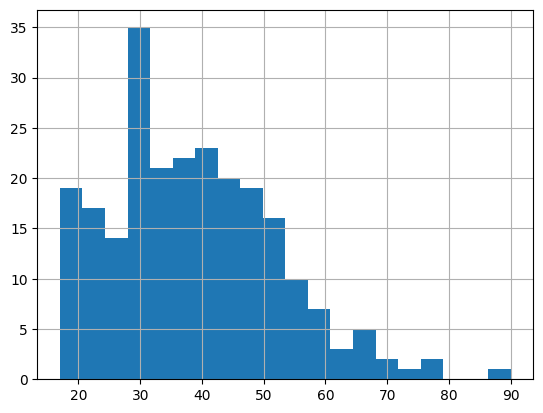

In [287]:
base_completa['idade'].hist(bins=20)

#Análise dos dados
Com o tratamento de dados finalizado, damos início à análise

In [288]:
def calcular_wcss(dados_headbrain_1):
    wcss = []
    for k in range(1,11): #do 1 ao 10, no programa tem que colocar 1 a mais
      kmeans = KMeans(n_clusters = k, random_state=0)
      kmeans.fit(X=dados_headbrain_1)
      wcss.append(kmeans.inertia_)
    return wcss

In [289]:
dados_headbrain_1 = base_completa[['Head Size(cm^3)', 'Brain Weight(grams)']]
dados_headbrain_1.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [290]:
wcss_headbrain = calcular_wcss(dados_headbrain_1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [291]:
#Visualizando os dados obtidos do WCSS
for i in range(len(wcss_headbrain)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_headbrain[i]}')

O cluster 0 possui valor de WCSS de: 34903864.185654
O cluster 1 possui valor de WCSS de: 12994263.409477172
O cluster 2 possui valor de WCSS de: 7402867.843870258
O cluster 3 possui valor de WCSS de: 4948479.069395586
O cluster 4 possui valor de WCSS de: 3591427.805072651
O cluster 5 possui valor de WCSS de: 2945421.0165694086
O cluster 6 possui valor de WCSS de: 2427060.557155791
O cluster 7 possui valor de WCSS de: 2091192.9499842413
O cluster 8 possui valor de WCSS de: 1855091.3936831956
O cluster 9 possui valor de WCSS de: 1693029.8596479567


In [292]:
grafico_wcss = px.line( x = range(1,11),
                        y = wcss_headbrain
                        )

fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss',
                  template =  'plotly_white'
                  )

fig.show()

In [293]:
kmeans_clientes = KMeans (n_clusters=3, random_state=42)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_headbrain_1)
base_completa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams),cluster
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.00,4754,Masculino,4512,1530,2
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.00,3923,Masculino,3738,1297,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.00,1100,Masculino,4261,1335,2
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.00,1100,Masculino,3777,1282,1
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.00,3430,Masculino,4177,1590,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.00,3565,Feminino,3214,1110,0
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.41,10671,Feminino,3394,1215,0
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.00,1964,Feminino,3233,1104,0
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.00,3951,Feminino,3352,1170,0


#Calcula os centroides de cada cluster

In [294]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[3248.15      , 1170.075     ],
       [3680.40186916, 1305.43925234],
       [4152.02      , 1415.06      ]])

In [296]:
grafico = px.scatter(x = base_completa['Head Size(cm^3)'],
                    y = base_completa['Brain Weight(grams)'],
                    color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Head Size(cm^3)',
                  yaxis_title= 'Brain Weight(grams)',
                  )
grafico_final.show()

# Segmentando os clientes baseado na análise dos clusters


In [ ]:
cluster_clientes = base_completa
cluster_clientes

In [299]:
#Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Tamanho Grande'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Tamanho Médio'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Tamanho Pequeno'
cluster_clientes

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero,Head Size(cm^3),Brain Weight(grams),cluster,nome_cluster
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.00,4754,Masculino,4512,1530,2,Tamanho Grande
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.00,3923,Masculino,3738,1297,1,Tamanho Médio
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.00,1100,Masculino,4261,1335,2,Tamanho Grande
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.00,1100,Masculino,3777,1282,1,Tamanho Médio
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.00,3430,Masculino,4177,1590,2,Tamanho Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,33,Funcionário Setor Privado,Ensino Médio Completo,16,Divorciado,Amarelo,0.00,3565,Feminino,3214,1110,0,Tamanho Pequeno
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.41,10671,Feminino,3394,1215,0,Tamanho Pequeno
234,235,59,Servidor Público,Ensino Médio Incompleto,26,Casado,Branco,1.00,1964,Feminino,3233,1104,0,Tamanho Pequeno
235,236,40,Servidor Público,Ensino Médio Completo,7,Solteiro,Branco,1.00,3951,Feminino,3352,1170,0,Tamanho Pequeno


#Análise dos clusters criados

In [366]:
#Verifica os valores de head size por cluster
#Pergunta 6 - Após aplicar o algoritmo de agrupamento, gere uma estatística com a função describe da variável Head Size(cm^3)
#agrupando os resultados por cluster e responda a alternativa CORRETA

cluster_clientes.groupby('nome_cluster')['Head Size(cm^3)'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Tamanho Grande,50.0,4152.020000,189.529115,3876.0,4009.0,4108.5,4259.0,4747.0
Tamanho Médio,107.0,3680.401869,134.637519,3443.0,3571.0,3669.0,3794.5,3930.0
Tamanho Pequeno,80.0,3248.150000,168.631206,2720.0,3157.5,3281.5,3389.5,3490.0


In [ ]:
nome_cluster_estat = cluster_clientes.iloc[:,13].values

head_size_estat = cluster_clientes.iloc[:,10].values
print(nome_cluster_estat)
print(head_size_estat)

In [337]:
#Pergunta 7 - Estabeleça uma correlação entre as variáveis “Tamanho da Cabeça (cm³)” e “Peso do Cérebro (gramas)”. Em seguida,
#informe qual é o valor dessa correlação, arredondando-o para duas casas decimais.
#correlacao = cluster_clientes["Head Size(cm^3)"].corr(cluster_clientes["Brain Weight(grams)"])
#correlacao
np.corrcoef(cluster_clientes["Head Size(cm^3)"],cluster_clientes["Brain Weight(grams)"])

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

In [343]:
head_size = cluster_clientes.iloc[:,10].values
head_weight = cluster_clientes.iloc[:,11].values

np.corrcoef(head_size,head_weight)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

In [368]:
# Resposta da Pergunta 8
qtd_feminino_by_cluster = cluster_clientes.groupby("cluster")["genero"].agg(lambda x: (x == "Feminino").sum())

print(f"A quantidade de pessoas do gênero feminino no cluster de tamanho pequeno é: {qtd_feminino_by_cluster[0]} indivíduos")

A quantidade de pessoas do gênero feminino no cluster de tamanho pequeno é: 60 indivíduos


In [370]:
# Resposta da Pergunta 9
qtd_masculino_by_cluster = cluster_clientes.groupby("nome_cluster")["genero"].agg(lambda x: (x == "Masculino").sum())

Maior_cluster_masculino = qtd_masculino_by_cluster.sort_values(ascending=False).index[0]

print(f"O Cluster com maior quantidade de indivíduos masculinos é: {Maior_cluster_masculino}")

O Cluster com maior quantidade de indivíduos masculinos é: Tamanho Médio


In [373]:
# Resposta da Pergunta 10
media_idade_cluster_grande = cluster_clientes.groupby("nome_cluster")['idade'].mean()

print(f"A média de idade das pessoas do cluster de tamanho grande é de {media_idade_cluster_grande[2]}")

fig = px.box(cluster_clientes, x="nome_cluster", y="idade")
fig.show()

A média de idade das pessoas do cluster de tamanho grande é de 40.9625
